In [1]:
import os
import cv2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

In [3]:
class_list = os.listdir('data/')
class_list.remove('.DS_Store')
class_list

['dogs', 'cats', 'bike', 'flowers', 'horses', 'cars', 'human']

In [4]:
class_dict = dict(zip(class_list, list(range(0,len(class_list)))))
class_dict

{'dogs': 0,
 'cats': 1,
 'bike': 2,
 'flowers': 3,
 'horses': 4,
 'cars': 5,
 'human': 6}

In [5]:
image_list = []


for cls in class_list:
    images = os.listdir('data/' + cls)
    for i in images:
        img = cv2.imread('data/' + cls + '/' + i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(128,128))
        image_list.append(img)
image_array = np.array(image_list)
image_array = image_array.astype('float32')
image_array /= 255

In [6]:
print(type(image_array))
print(image_array.dtype)
print(image_array.shape)

<class 'numpy.ndarray'>
float32
(1803, 128, 128)


In [7]:
len(image_array)

1803

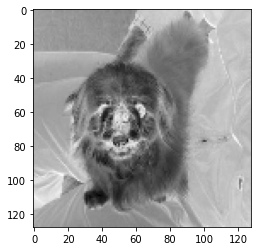

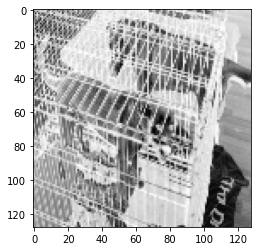

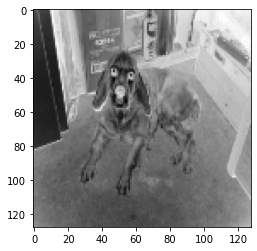

In [8]:
for i in range (0,3):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    plt.show()

In [9]:
# image_array = np.expand_dims(image_array, axis=3) 
image_array.shape

(1803, 128, 128)

In [10]:
def get_labels():
    labels = np.ones((image_array.shape[0]), dtype='int')
    count=0
    for cls in class_list:
        images = os.listdir('data/' + cls)
        labels[count:(len(images)+count)] = class_dict[cls]
        count += len(images)
#         print(len(images))
#         print(count)
    return labels

labels = get_labels()

{'dogs': 0, 'cats': 1, 'bike': 2, 'flowers': 3, 'horses': 4, 'cars': 5, 'human': 6}


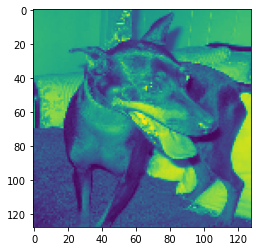

In [11]:
print(class_dict)

for i in range (200,202):
    display(plt.imshow(image_array[i]))

dogs


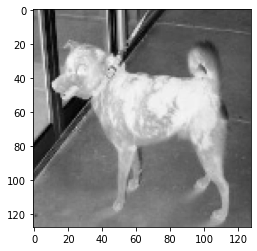

dogs


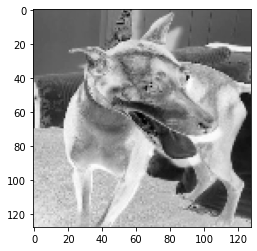

cats


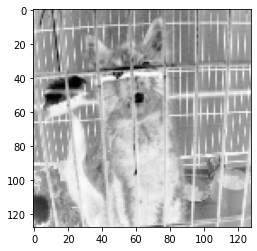

cats


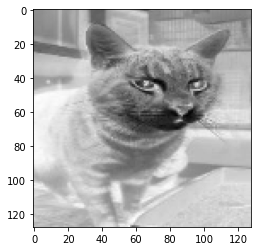

bike


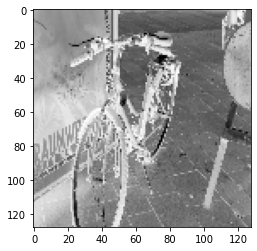

bike


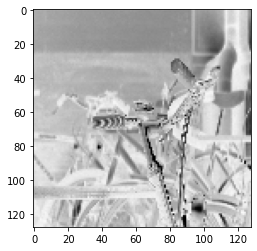

flowers


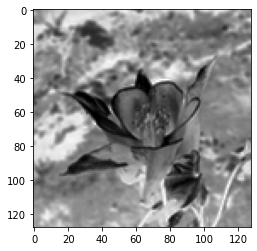

flowers


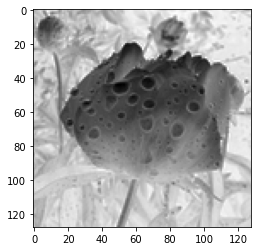

horses


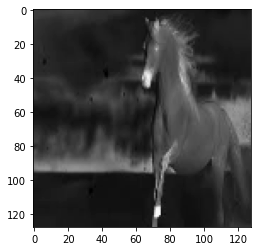

horses


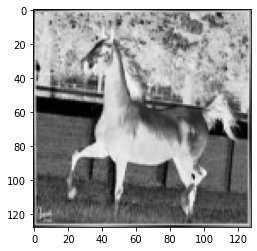

cars


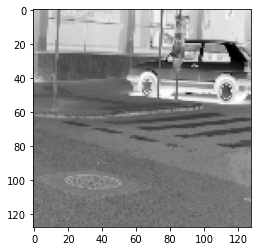

cars


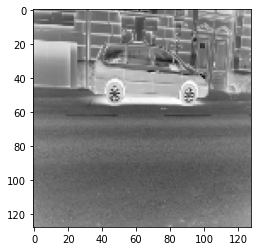

human


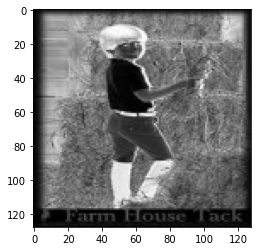

human


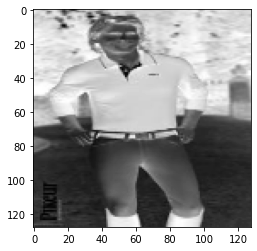

In [12]:
# Dog0 0-202

for i in range (200,202):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Cat1 202-404

for i in range (402,404):
    plt.imshow(image_array[i], cmap=plt.cm.binary)
    print(class_list[labels[i]])
    plt.show()

# Bike2 404-769

for i in range (767,769):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Flower3 769-976

for i in range (974,976):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Horse4 976-1181

for i in range (1179,1181):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

# Car5 1181-1601

for i in range (1599,1601):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])   
    plt.show()

# Human6 1601-1803

for i in range (1801,1803):
    plt.imshow(image_array[i], cmap=plt.cm.binary) 
    print(class_list[labels[i]])
    plt.show()

In [13]:
from keras.utils import np_utils

y = np_utils.to_categorical(labels, len(class_list))

length_counts = []

for i in y:
    if len(i) not in length_counts:
        length_counts.append(len(i))
length_counts

[7]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array, y, test_size=0.15, random_state=42, shuffle=True)

cats


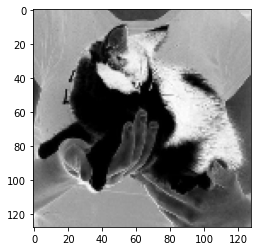

bike


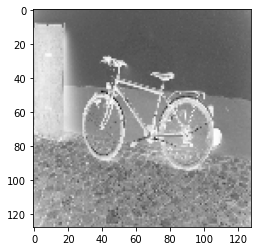

cats


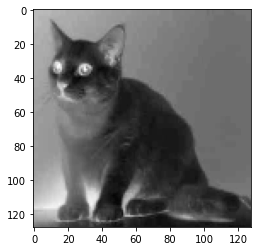

bike


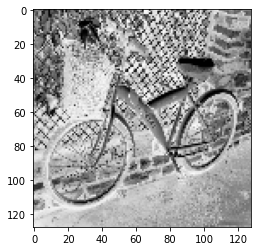

cars


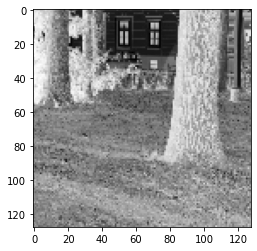

In [15]:
import random
for i in range(0,5):
    n = random.randint(1,len(X_train))
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    class_index = int(np.flatnonzero(y_train[i]))
    print(class_list[class_index])
    plt.show()

In [16]:
# Flatten

# X_train = X_train.reshape(len(X_train), 128**2).astype('float32')
# X_test = X_test.reshape(len(X_test), 128**2).astype('float32')

print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

X_train shape = (1532, 128, 128)
X_test shape = (271, 128, 128)


In [17]:
image_array.shape

(1803, 128, 128)

In [18]:
input_shape=image_array[0].shape
# input_shape = image_array.shape[0]

# input_shape = np.expand_dims(input_shape, axis=0)
input_shape

(128, 128)

In [19]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

from tensorflow.keras.layers import Conv2D, Conv1D

cnn_model = Sequential([
    Conv2D(32,1,1,padding='same',activation='relu',input_shape = (128, 128, 1)),
    Conv2D(32,1,1,activation='LeakyReLU'),
    MaxPooling2D(pool_size=(2,2)) ,
    Dropout(0.3),
    Flatten(), 
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(len(class_list), activation = 'softmax')
])




Metal device set to: Apple M1 Pro


2022-05-16 20:55:24.375210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-16 20:55:24.375329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [20]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adadelta',metrics=['acc'])


In [21]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      64        
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      1056      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 128)               16777344  
                                                        

In [22]:
num_channel=1
num_epoch=500

In [23]:
hist = cnn_model.fit(X_train, y_train, batch_size=32, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test))
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

Epoch 1/500


2022-05-16 20:55:25.153101: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-16 20:55:25.393950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - ETA: 0s - loss: 1.9238 - acc: 0.1991

2022-05-16 20:55:32.524946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/48 [==============================] - 8s 98ms/step - loss: 1.9238 - acc: 0.1991 - val_loss: 1.8818 - val_acc: 0.2362
Epoch 2/500
48/48 [==============================] - 4s 91ms/step - loss: 1.8863 - acc: 0.2533 - val_loss: 1.8680 - val_acc: 0.2325
Epoch 3/500
48/48 [==============================] - 4s 90ms/step - loss: 1.8736 - acc: 0.2474 - val_loss: 1.8592 - val_acc: 0.2325
Epoch 4/500
48/48 [==============================] - 4s 90ms/step - loss: 1.8727 - acc: 0.2572 - val_loss: 1.8490 - val_acc: 0.2362
Epoch 5/500
48/48 [==============================] - 4s 89ms/step - loss: 1.8544 - acc: 0.2617 - val_loss: 1.8406 - val_acc: 0.2399
Epoch 6/500
48/48 [==============================] - 4s 90ms/step - loss: 1.8499 - acc: 0.2670 - val_loss: 1.8328 - val_acc: 0.2435
Epoch 7/500
48/48 [==============================] - 4s 90ms/step - loss: 1.8349 - acc: 0.2650 - val_loss: 1.8232 - val_acc: 0.2546
Epoch 8/500
48/48 [==============================] - 4s 89ms/step - loss: 1.8258 - acc: 

Epoch 63/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5818 - acc: 0.4602 - val_loss: 1.6143 - val_acc: 0.4280
Epoch 64/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5805 - acc: 0.4595 - val_loss: 1.6094 - val_acc: 0.4354
Epoch 65/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5794 - acc: 0.4582 - val_loss: 1.6078 - val_acc: 0.4354
Epoch 66/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5781 - acc: 0.4478 - val_loss: 1.6063 - val_acc: 0.4280
Epoch 67/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5659 - acc: 0.4641 - val_loss: 1.6043 - val_acc: 0.4317
Epoch 68/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5703 - acc: 0.4615 - val_loss: 1.6017 - val_acc: 0.4354
Epoch 69/500
48/48 [==============================] - 4s 89ms/step - loss: 1.5664 - acc: 0.4602 - val_loss: 1.6024 - val_acc: 0.4354
Epoch 70/500
48/48 [==============================] - 4s 89ms/step - 

48/48 [==============================] - 4s 89ms/step - loss: 1.4504 - acc: 0.4974 - val_loss: 1.5285 - val_acc: 0.4686
Epoch 125/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4564 - acc: 0.4974 - val_loss: 1.5281 - val_acc: 0.4686
Epoch 126/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4449 - acc: 0.4993 - val_loss: 1.5270 - val_acc: 0.4649
Epoch 127/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4439 - acc: 0.5104 - val_loss: 1.5282 - val_acc: 0.4760
Epoch 128/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4518 - acc: 0.5104 - val_loss: 1.5231 - val_acc: 0.4760
Epoch 129/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4482 - acc: 0.5085 - val_loss: 1.5235 - val_acc: 0.4723
Epoch 130/500
48/48 [==============================] - 4s 88ms/step - loss: 1.4405 - acc: 0.5170 - val_loss: 1.5213 - val_acc: 0.4723
Epoch 131/500
48/48 [==============================] - 4s 88ms/step - loss: 

48/48 [==============================] - 4s 89ms/step - loss: 1.3522 - acc: 0.5424 - val_loss: 1.4734 - val_acc: 0.4871
Epoch 186/500
48/48 [==============================] - 4s 89ms/step - loss: 1.3566 - acc: 0.5424 - val_loss: 1.4736 - val_acc: 0.4797
Epoch 187/500
48/48 [==============================] - 4s 89ms/step - loss: 1.3600 - acc: 0.5483 - val_loss: 1.4695 - val_acc: 0.4945
Epoch 188/500
48/48 [==============================] - 4s 89ms/step - loss: 1.3414 - acc: 0.5450 - val_loss: 1.4684 - val_acc: 0.4908
Epoch 189/500
48/48 [==============================] - 4s 89ms/step - loss: 1.3482 - acc: 0.5496 - val_loss: 1.4675 - val_acc: 0.4871
Epoch 190/500
48/48 [==============================] - 4s 89ms/step - loss: 1.3485 - acc: 0.5418 - val_loss: 1.4673 - val_acc: 0.4871
Epoch 191/500
48/48 [==============================] - 4s 88ms/step - loss: 1.3547 - acc: 0.5424 - val_loss: 1.4709 - val_acc: 0.4834
Epoch 192/500
48/48 [==============================] - 4s 88ms/step - loss: 

48/48 [==============================] - 4s 89ms/step - loss: 1.2797 - acc: 0.5757 - val_loss: 1.4306 - val_acc: 0.4945
Epoch 247/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2760 - acc: 0.5744 - val_loss: 1.4295 - val_acc: 0.4908
Epoch 248/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2732 - acc: 0.5816 - val_loss: 1.4283 - val_acc: 0.5018
Epoch 249/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2787 - acc: 0.5705 - val_loss: 1.4267 - val_acc: 0.4908
Epoch 250/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2809 - acc: 0.5796 - val_loss: 1.4286 - val_acc: 0.4908
Epoch 251/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2710 - acc: 0.5751 - val_loss: 1.4268 - val_acc: 0.4871
Epoch 252/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2712 - acc: 0.5646 - val_loss: 1.4237 - val_acc: 0.4834
Epoch 253/500
48/48 [==============================] - 4s 89ms/step - loss: 

48/48 [==============================] - 4s 88ms/step - loss: 1.2069 - acc: 0.5992 - val_loss: 1.4011 - val_acc: 0.4982
Epoch 308/500
48/48 [==============================] - 557s 90ms/step - loss: 1.2083 - acc: 0.6038 - val_loss: 1.4000 - val_acc: 0.4982
Epoch 309/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2087 - acc: 0.6051 - val_loss: 1.3993 - val_acc: 0.4945
Epoch 310/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2035 - acc: 0.6018 - val_loss: 1.3986 - val_acc: 0.4908
Epoch 311/500
48/48 [==============================] - 4s 90ms/step - loss: 1.2093 - acc: 0.5992 - val_loss: 1.3971 - val_acc: 0.4945
Epoch 312/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2080 - acc: 0.5986 - val_loss: 1.3954 - val_acc: 0.5092
Epoch 313/500
48/48 [==============================] - 4s 89ms/step - loss: 1.2051 - acc: 0.5966 - val_loss: 1.3932 - val_acc: 0.4982
Epoch 314/500
48/48 [==============================] - 4s 92ms/step - loss

48/48 [==============================] - 4s 89ms/step - loss: 1.1492 - acc: 0.6214 - val_loss: 1.3754 - val_acc: 0.5018
Epoch 369/500
48/48 [==============================] - 4s 90ms/step - loss: 1.1470 - acc: 0.6345 - val_loss: 1.3691 - val_acc: 0.5018
Epoch 370/500
48/48 [==============================] - 4s 90ms/step - loss: 1.1447 - acc: 0.6299 - val_loss: 1.3751 - val_acc: 0.5055
Epoch 371/500
48/48 [==============================] - 4s 89ms/step - loss: 1.1438 - acc: 0.6227 - val_loss: 1.3693 - val_acc: 0.5055
Epoch 372/500
48/48 [==============================] - 4s 89ms/step - loss: 1.1493 - acc: 0.6247 - val_loss: 1.3707 - val_acc: 0.5018
Epoch 373/500
48/48 [==============================] - 4s 89ms/step - loss: 1.1365 - acc: 0.6234 - val_loss: 1.3735 - val_acc: 0.5055
Epoch 374/500
48/48 [==============================] - 4s 90ms/step - loss: 1.1431 - acc: 0.6260 - val_loss: 1.3695 - val_acc: 0.5018
Epoch 375/500
48/48 [==============================] - 4s 89ms/step - loss: 

48/48 [==============================] - 4s 89ms/step - loss: 1.0929 - acc: 0.6488 - val_loss: 1.3536 - val_acc: 0.5166
Epoch 430/500
48/48 [==============================] - 4s 90ms/step - loss: 1.0906 - acc: 0.6384 - val_loss: 1.3541 - val_acc: 0.5018
Epoch 431/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0860 - acc: 0.6482 - val_loss: 1.3533 - val_acc: 0.5129
Epoch 432/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0890 - acc: 0.6521 - val_loss: 1.3499 - val_acc: 0.5166
Epoch 433/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0786 - acc: 0.6501 - val_loss: 1.3493 - val_acc: 0.5240
Epoch 434/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0932 - acc: 0.6482 - val_loss: 1.3536 - val_acc: 0.5203
Epoch 435/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0856 - acc: 0.6449 - val_loss: 1.3505 - val_acc: 0.5092
Epoch 436/500
48/48 [==============================] - 4s 89ms/step - loss: 

48/48 [==============================] - 31s 649ms/step - loss: 1.0408 - acc: 0.6678 - val_loss: 1.3372 - val_acc: 0.5240
Epoch 491/500
48/48 [==============================] - 4s 90ms/step - loss: 1.0270 - acc: 0.6775 - val_loss: 1.3391 - val_acc: 0.5166
Epoch 492/500
48/48 [==============================] - 4s 90ms/step - loss: 1.0294 - acc: 0.6684 - val_loss: 1.3388 - val_acc: 0.5277
Epoch 493/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0385 - acc: 0.6658 - val_loss: 1.3396 - val_acc: 0.5203
Epoch 494/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0335 - acc: 0.6678 - val_loss: 1.3411 - val_acc: 0.5314
Epoch 495/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0370 - acc: 0.6664 - val_loss: 1.3322 - val_acc: 0.5351
Epoch 496/500
48/48 [==============================] - 4s 89ms/step - loss: 1.0337 - acc: 0.6678 - val_loss: 1.3377 - val_acc: 0.5277
Epoch 497/500
48/48 [==============================] - 4s 89ms/step - loss

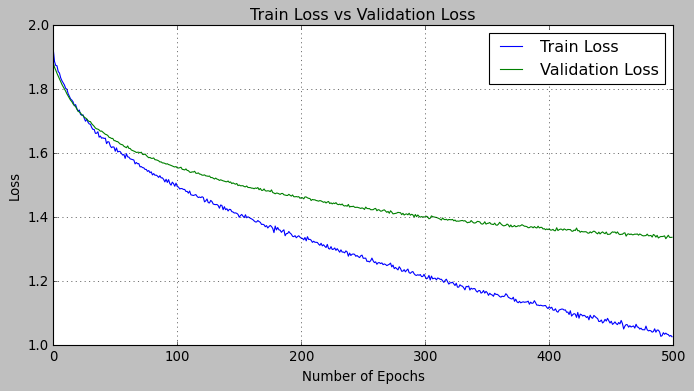

In [29]:
plt.figure(1,figsize=(10,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train Loss','Validation Loss'])
plt.style.use('classic')

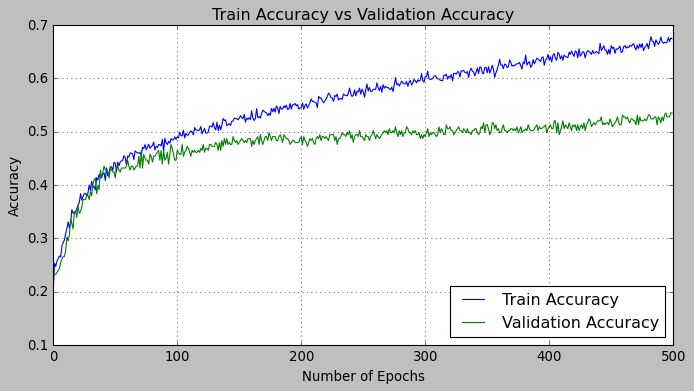

In [30]:
plt.figure(2,figsize=(10,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.grid(True)
plt.legend(['Train Accuracy','Validation Accuracy'],loc=4)

In [31]:

score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.3365389108657837
Test Accuracy: 0.5350553393363953


[[0.3234315  0.19396757 0.129761   0.08398573 0.10136834 0.09958737
  0.06789858]]
[[0. 0. 0. 1. 0. 0. 0.]]


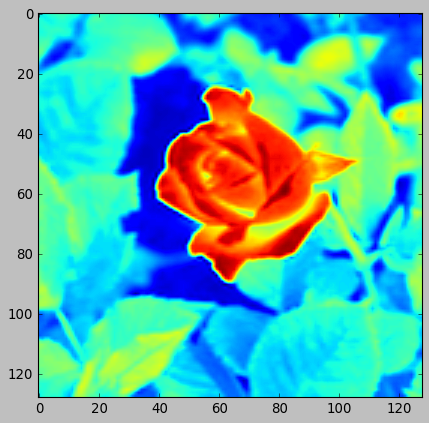

In [32]:
test_image = X_test[0:1]
# print (test_image.shape)
print(cnn_model.predict(test_image))
prediction = cnn_model.predict(test_image)
print(y_test[0:1])

image = test_image.reshape((128,128))
plt.imshow(image)
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = cnn_model.predict(X_test)
# print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)

# y_pred
# print(y_pred)
# print(class_dict)
print(classification_report(np.argmax(y_test, axis=1), y_pred, target_names=class_dict))

              precision    recall  f1-score   support

        dogs       0.25      0.15      0.19        27
        cats       0.62      0.15      0.24        34
        bike       0.60      0.77      0.67        56
     flowers       0.53      0.55      0.54        31
      horses       0.45      0.63      0.52        27
        cars       0.52      0.65      0.58        63
       human       0.69      0.55      0.61        33

    accuracy                           0.54       271
   macro avg       0.52      0.49      0.48       271
weighted avg       0.54      0.54      0.51       271



In [40]:
print('Confusion Matrix \n')
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

Confusion Matrix 

[[ 4  0  9  2  2  7  3]
 [ 6  5  4  5  7  5  2]
 [ 0  0 43  2  0 10  1]
 [ 3  2  3 17  0  5  1]
 [ 0  1  0  2 17  7  0]
 [ 1  0 10  2  8 41  1]
 [ 2  0  3  2  4  4 18]]
